In [3]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import matplotlib as mpl

import omero

%matplotlib inline
mpl.rcParams['figure.dpi'] = 300
mpl.rcParams['figure.figsize'] = (10, 10)


from glob import glob
from tifffile import imread
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D

np.random.seed(6)
lbl_cmap = random_label_cmap()



from omero_utils.widgets import OMEConnect
from omero_utils.imageio import OmeroImageReader

os.environ["MXNET_USE_FUSION"] = "0"
m = OMEConnect(host="139.124.86.50")

m

OMEConnect(children=(Text(value='', description='OME loggin'), Password(description='OME password'), Button(de…

In [1]:


from omero_utils.widgets import OMEConnect
from omero_utils.imageio import OmeroImageReader

os.environ["MXNET_USE_FUSION"] = "0"
m = OMEConnect(host="139.124.86.50")

m

OMEConnect(children=(Text(value='', description='OME loggin'), Password(description='OME password'), Button(de…

In [7]:
reader = OmeroImageReader(18652, m.conn)


Treating 18652
No objective found


In [8]:
reader.metadata

{'SizeZ': 24,
 'SizeC': 4,
 'SizeT': 1,
 'Id': 18652,
 'AquisitionDate': None,
 'PhysicalSizeX': 0.20756646174321788,
 'ChannelLabels': ['0', '1', '2', '3'],
 'LensNA': nan,
 'nominalMagnification': nan}

In [9]:
imgs = [reader.get_plane(0, z, 0) for z in range(reader.metadata['SizeZ'])]

In [11]:
model = StarDist2D.from_pretrained('2D_versatile_fluo')


Found model '2D_versatile_fluo' for 'StarDist2D'.
5324800/5320433 [==============================] - 0s 0us/step
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [12]:
img = normalize(imgs[12], 1, 99.8)
labels, details = model.predict_instances(img)

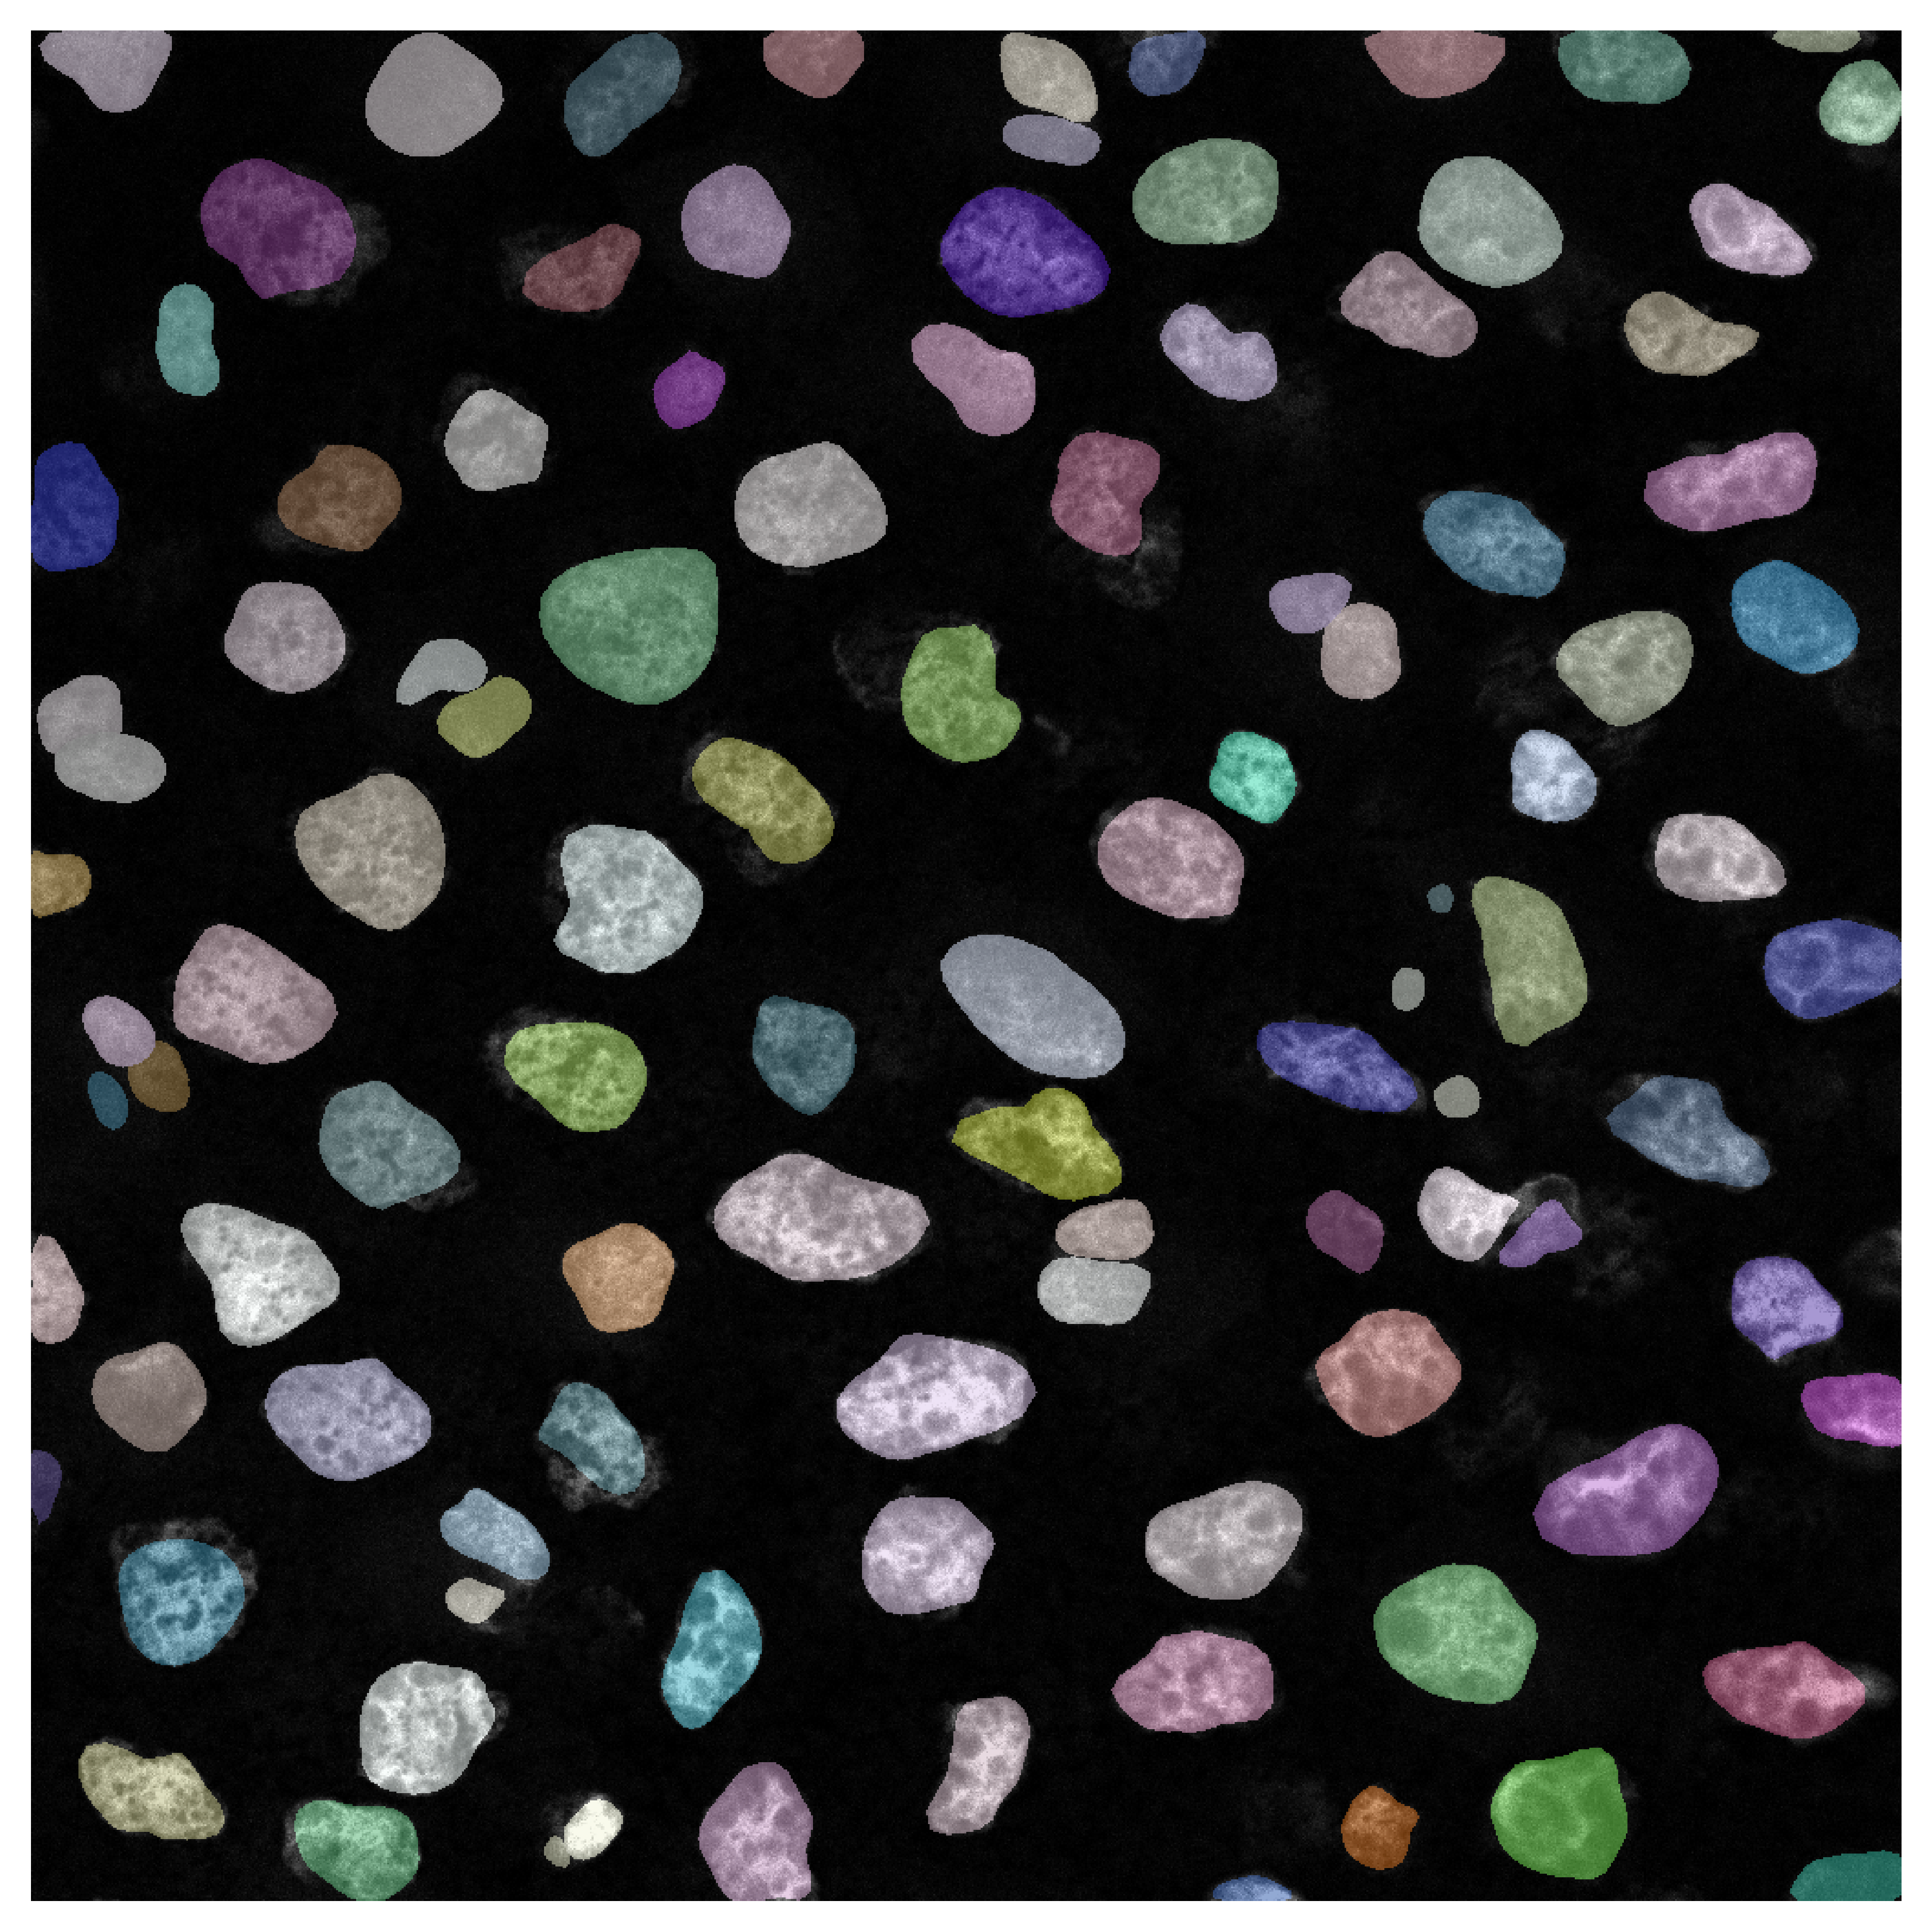

In [13]:


plt.figure(figsize=(8,8))
plt.imshow(img, clim=(0,1), cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');



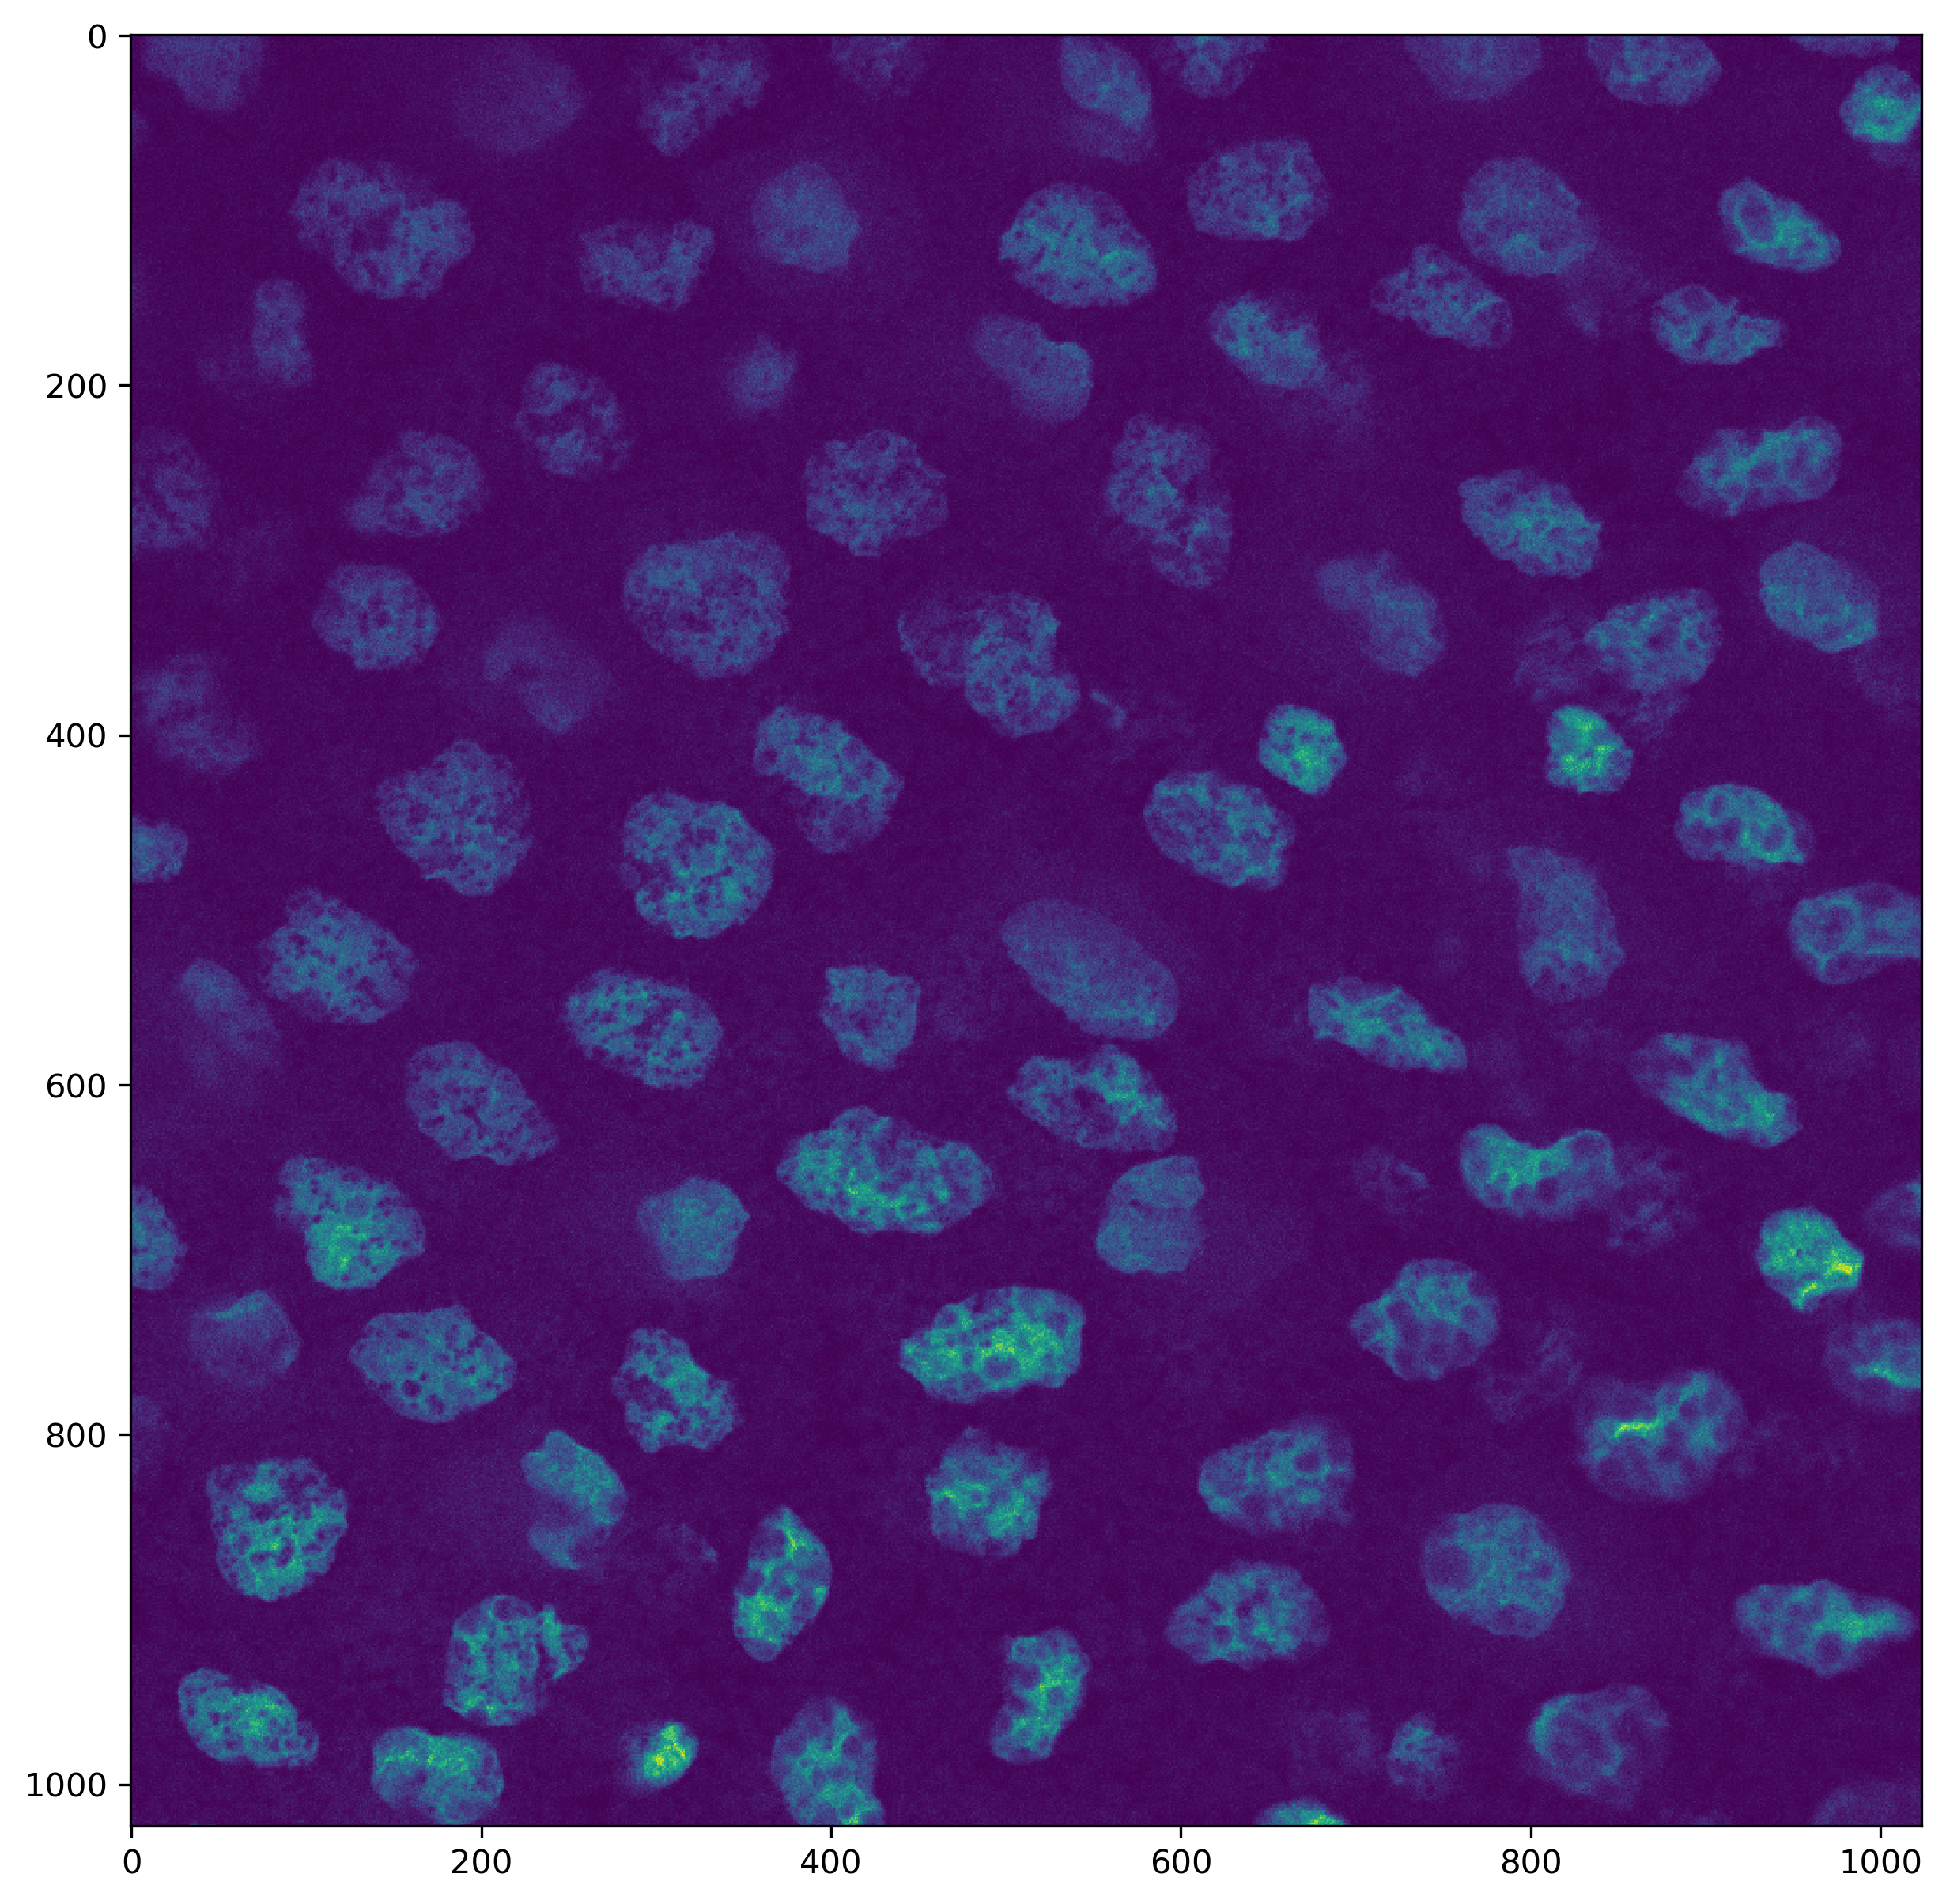

In [15]:
fig, ax = plt.subplots()

ax.imshow(imgs[12])